Gaming is very common nowadays amon youngsters. This part aims to detect the emotional state of the people during gaming. We make use of the popular gaming stimulation dataset AGAIN affect gaming annotation dataset- data. This data contains realtime annotation of gamers and their arousal levels.




First we begin by loading the data and separating it into categorical and continuous features. Categorical feature are those which have classes or which are quantised whereas continuous features are not quantised as the name suggests. We convert the categorical features to integers using the labelencoder from sklearn. Finally, we use the popular TabNet model to perform regression. TabNet is one of the most widely used and a highly accurate model for both tabular classification and regression. In the end we also plot out the explanation masks from the trained model.


In [ ]:
!gdown --id 1WOI30_JwR-DjB04-5YA4jte38d3ugmB2

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1WOI30_JwR-DjB04-5YA4jte38d3ugmB2
From (redirected): https://drive.google.com/uc?id=1WOI30_JwR-DjB04-5YA4jte38d3ugmB2&confirm=t&uuid=f741faa7-511b-41a5-9057-276d9deed43a
To: /content/clean_data.csv
100% 263M/263M [00:06<00:00, 40.0MB/s]


In [ ]:
import pandas as pd
df = pd.read_csv('clean_data.csv')
df.head()

<ipython-input-2-f81d74a3c002>:2: DtypeWarning: Columns (23,24,98,99,100) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clean_data.csv')


,[control]genre,[control]player_id,[control]session_id,[control]game,[control]time_index,[control]epoch,[control]time_stamp,[control]engine_tick,[output]arousal,[general]time_passed,...,player_slow_pickup,player_has_powerup,bot_has_collisions,bot_is_colliding_above,bot_is_colliding_below,bot_is_colliding_left,bot_is_colliding_right,bot_is_falling,bot_is_jumping,bot_charging
0,Platformer,018B0D8D-B5EC-09D6-90ED-550058EBFEAF,F00C622C-374A-4F8D-65A0-CFBDA1922336,Endless,0 days 00:00:00,1.589291e+12,0.0000,39,0.214286,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Platformer,018B0D8D-B5EC-09D6-90ED-550058EBFEAF,F00C622C-374A-4F8D-65A0-CFBDA1922336,Endless,0 days 00:00:00.250000,1.589291e+12,0.2524,39,0.214286,0.002056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Platformer,018B0D8D-B5EC-09D6-90ED-550058EBFEAF,F00C622C-374A-4F8D-65A0-CFBDA1922336,Endless,0 days 00:00:00.500000,1.589291e+12,0.5052,39,0.214286,0.004115,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Platformer,018B0D8D-B5EC-09D6-90ED-550058EBFEAF,F00C622C-374A-4F8D-65A0-CFBDA1922336,Endless,0 days 00:00:00.750000,1.589291e+12,0.7572,39,0.214286,0.006167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Platformer,018B0D8D-B5EC-09D6-90ED-550058EBFEAF,F00C622C-374A-4F8D-65A0-CFBDA1922336,Endless,0 days 00:00:01,1.589291e+12,1.0123,39,0.214286,0.008245,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

In [ ]:
df['[output]arousal'].unique()

array([0.21428571, 0.14285714, 0.07142857, ..., 0.94702602, 0.96561338,
       0.98420074])

In [ ]:
!pip install pytorch-tabnet -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.4 MB/s eta 0:00:00


In [ ]:
from pytorch_tabnet.tab_model import TabNetRegressor

import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import numpy as np


In [ ]:
categorical_columns = []
categorical_dims =  {}
for col in df.columns[df.dtypes == object]:
    print(col, df[col].nunique())
    l_enc = LabelEncoder()
    df[col] = df[col].fillna("NA")
    df[col] = l_enc.fit_transform(df[col].values)
    categorical_columns.append(col)
    categorical_dims[col] = len(l_enc.classes_)
for col in df.columns[df.dtypes == 'int64']:
    df.fillna(df.loc[:, col].mean(), inplace=True)

for col in df.columns[df.dtypes == 'float64']:
    df.fillna(df.loc[:, col].mean(), inplace=True)

[control]genre 3
[control]player_id 122
[control]session_id 995
[control]game 9
[control]time_index 522
[string]key_presses 53609
[string]player_aim_target 70
[string]bot_damaged_by 9
[string]player_damaged_by 25
[string]bot_types 64
[string]pick_up_types 27


In [ ]:
target = '[output]arousal'

features = [ col for col in df.columns if col not in [target]]

cat_idxs = [ i for i, f in enumerate(features) if f in categorical_columns]
cat_dims = [ categorical_dims[f] for i, f in enumerate(features) if f in categorical_columns]
cat_dims

[3, 122, 995, 9, 522, 53610, 71, 10, 26, 65, 28]

In [ ]:
cat_emb_dim = [2, 64, 128, 6, 128, 1024, 16, 3,8,4,5]

In [ ]:
clf = TabNetRegressor(cat_dims=cat_dims, cat_emb_dim=cat_emb_dim, cat_idxs=cat_idxs)

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


In [ ]:
X_train = df[features].values
y_train = df[target].values.reshape(-1, 1)

In [ ]:
clf.fit(
    X_train=X_train, y_train=y_train,
    eval_metric=['rmsle', 'mae', 'rmse', 'mse'],
    max_epochs=25,
    patience=50,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.07822 |  0:00:35s
epoch 1  | loss: 0.06674 |  0:01:10s
epoch 2  | loss: 0.05683 |  0:01:43s
epoch 3  | loss: 0.04041 |  0:02:16s
epoch 4  | loss: 0.03082 |  0:02:50s
epoch 5  | loss: 0.02684 |  0:03:24s
epoch 6  | loss: 0.02378 |  0:03:58s
epoch 7  | loss: 0.02129 |  0:04:31s
epoch 8  | loss: 0.0195  |  0:05:05s
epoch 9  | loss: 0.01832 |  0:05:38s
epoch 10 | loss: 0.01671 |  0:06:11s
epoch 11 | loss: 0.01535 |  0:06:45s
epoch 12 | loss: 0.01435 |  0:07:19s
epoch 13 | loss: 0.01334 |  0:07:53s
epoch 14 | loss: 0.0127  |  0:08:27s
epoch 15 | loss: 0.01254 |  0:09:01s
epoch 16 | loss: 0.01138 |  0:09:34s
epoch 17 | loss: 0.01113 |  0:10:08s
epoch 18 | loss: 0.01033 |  0:10:42s
epoch 19 | loss: 0.01007 |  0:11:17s
epoch 20 | loss: 0.00915 |  0:11:51s
epoch 21 | loss: 0.00852 |  0:12:25s
epoch 22 | loss: 0.00838 |  0:13:00s
epoch 23 | loss: 0.00823 |  0:13:33s
epoch 24 | loss: 0.00757 |  0:14:08s


In [ ]:
preds = clf.predict(X_train)
y_true = y_train
test_score = mean_squared_error(y_pred=preds, y_true=y_true)

In [ ]:
print('Predictions: ', preds)

Predictions:  [[0.14831346]
 [0.10597676]
 [0.1109795 ]
 ...
 [0.53795314]
 [0.39252844]
 [0.36106905]]


In [ ]:
print(X_train[0])

[0.00000000e+00 0.00000000e+00 9.36000000e+02 1.00000000e+00
 0.00000000e+00 1.58929112e+12 0.00000000e+00 3.90000000e+01
 0.00000000e+00 3.27868852e-01 3.33333333e-01 5.12821000e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.51748266e-01
 2.50000000e-01 3.69060000e+04 2.80000000e+01 2.00000000e+00
 3.27868852e-01 4.87179000e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00047416e+00 0.00000000e+00
 1.00047416e+00 1.00000000e+00 1.00047416e+00 0.00000000e+00
 1.00000000e+00 1.00047416e+00 0.00000000e+00 0.00000000e+00
 1.00047416e+00 1.00047416e+00 1.00047416e+00 1.00047416e+00
 1.00047416e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.00047416e+00 0.00000000e+00 1.00047416e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00047416e+00
 0.00000000e+00 0.00000000e+00 1.00047416e+00 0.00000000e+00
 0.00000000e+00 1.00047416e+00 1.00047416e+00 0.00000000e+00
 1.00047416e+00 1.000474

In [ ]:
print(preds[0])

[0.14831346]


In [ ]:
clf.feature_importances_

array([1.09611470e-07, 0.00000000e+00, 1.66888897e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.76556602e-02, 0.00000000e+00,
       2.85730744e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.37809775e-04, 2.82164542e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.39342357e-02, 0.00000000e+00, 1.76547264e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.36931763e-01,
       0.00000000e+00, 0.00000000e+00, 2.41108323e-02, 0.00000000e+00,
       7.49237666e-02, 0.00000000e+00, 0.00000000e+00, 1.46185922e-02,
      

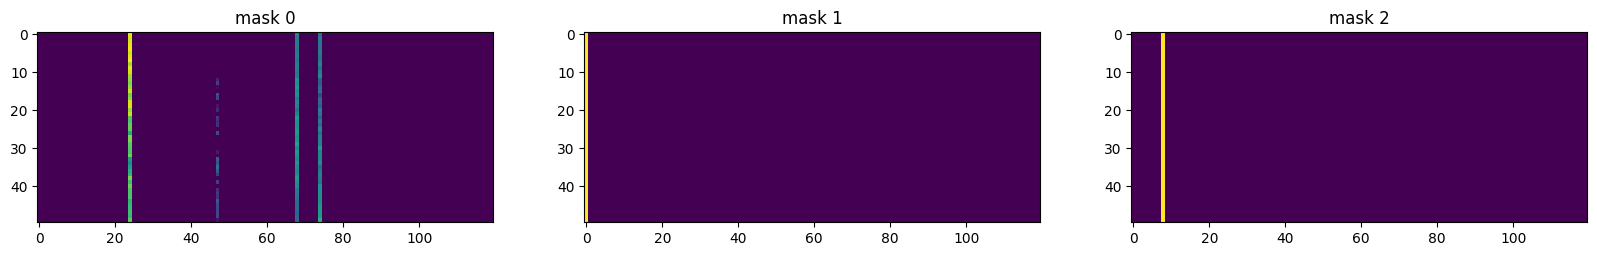

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline
explain_matrix, masks = clf.explain(X_train)
fig, axs = plt.subplots(1, 3, figsize=(20,20))

for i in range(3):
    axs[i].imshow(masks[i][:50])
    axs[i].set_title(f"mask {i}")